# Pandas cookbook

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Creating DataFrames

### Building a DataFrame

Pass a dictionary of {column_name: column_values}. Using list(zip()) may be useful for adding names to values

In [21]:
my_df = pd.DataFrame({'A': [1, 2, 3], 'B': ['I', 'II', 'III']})
print(my_df)

   A    B
0  1    I
1  2   II
2  3  III


Broadcast a single value to all rows

In [27]:
my_df = pd.DataFrame({'A': [1, 2, 3], 'Type': 'Number'})
print(my_df)

   A    Type
0  1  Number
1  2  Number
2  3  Number


Random numbers in a DataFrame

In [22]:
my_df = pd.DataFrame(np.random.randint(low=0, high=10, size=(3,3)),
                     columns=['A', 'B', 'C'])
print(my_df)

   A  B  C
0  6  8  7
1  3  8  6
2  6  9  0


Setting the index

In [4]:
my_df = pd.DataFrame(np.random.randint(low=0, high=10, size=(3,3)),
                     columns=['On', 'Tw', 'Th'])
my_df.index = ['Fir', 'Sec', 'Thi']
print(my_df)

     On  Tw  Th
Fir   8   8   2
Sec   6   5   5
Thi   5   0   9


### Reading Into a DataFrame

From CSV:

In [3]:
df = pd.read_csv('./volc_holocene.csv',
                 header=0,    # Give the row with the column names
                              # Start reading data from after this point
                              # Can be a list for setting a multi-index
                              # Set None if there are no names
                 delimiter=',', # Override the delimiter
                 comment='#', # Specify a comment marker
                 nrows=3,     # Limit the number of rows to read
                 index_col='Number', # Give a column name or number to
                )                    #    become the index
df.head()

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
Number,,,,,,,,,,,
210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)


From an Excel file:

In [20]:
xl = pd.ExcelFile('favorites.xlsx')
print(xl.sheet_names)                  # Get a list of sheets
df = xl.parse('Colors',                # Get a sheet as a DataFrame. By name or index
               skiprows=[1],           # Don't load these rows
               parse_cols=[1, 2, 3, 4, 5, 6, 7],  # List of columns to parse
               names=['Y', 'm', 'd', 'H', 'M', 'S', 'Color'])        # List of column names
df.head()

['Colors', 'Foods']


,Y,m,d,H,M,S,Color
0,2024,5,15,19,17,53,Green
1,2015,6,22,14,19,44,Blue


In [22]:
# Alternatively,
xl = pd.read_excel('favorites.xlsx', sheetname=None)
df = xl['Colors']
df.head()

,Year,Month,Day,Hour,Minute,Second,Favorite Colour
NaN,2019,2,24,9,15,2,Red
NaN,2024,5,15,19,17,53,Green
NaN,2015,6,22,14,19,44,Blue


From SAS file: (for the Statistical Analysis System)

In [39]:
from sas7bdat import SAS7BDAT
with SAS7BDAT('food.sas7bdat') as sas_file:
    sas_df = sas_file.to_data_frame()
sas_df.head()

,FOOD_EXP,INCOME
0,115.220001,3.69
1,135.979996,4.39
2,119.339996,4.75
3,114.959999,6.03
4,187.050003,12.47


From Stata file: (STAtistical daTA)

In [40]:
stata_df = pd.read_stata('euro.dta')
stata_df.head()

,r
0,-2.554278
1,10.878110
2,-0.236407
3,1.540284
4,0.700117


From HDF5: (Hierarchical Data Format 5)

In [43]:
import h5py
data = h5py.File('ligo.hdf5', 'r')   # Open for reading
list(data.keys())    # Show the groups in the dataset

['meta', 'quality', 'strain']

In [58]:
group = data['meta']
list(group.keys())      # Check the values in the group
group['Description'].value

b'Strain data time series from LIGO'

From Matlab:    (Matrix Laboratory)

In [71]:
import scipy.io
mat = scipy.io.loadmat('')

FileNotFoundError: [Errno 2] No such file or directory: ''

From SQL database:    (Structured Query Language, e.g. SQLite, MySQL, or PostgreSQL)

In [3]:
import sqlalchemy
engine = sqlalchemy.create_engine('sqlite:///chinook.db')      # Give a type spec and a path
print(engine.table_names())       # Get a list of the names of the tables. No connection needed

['albums', 'artists', 'customers', 'employees', 'genres', 'invoice_items', 'invoices', 'media_types', 'playlist_track', 'playlists', 'sqlite_sequence', 'sqlite_stat1', 'tracks']


In [16]:
with engine.connect() as con:                         # Otherwise, call con.close()
    result = con.execute("SELECT * FROM genres")       # Perform a SQL query
    df = pd.DataFrame(result.fetchall())              # Get all results
    # df = pd.DataFrame(result.fetchmany(size=10))    # Get a subset of the results
    df.columns = result.keys()                        # Pull the column names from the result
df.head()

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


Or with pandas:

In [8]:
# Remember inner joins?
df = pd.read_sql_query("SELECT * FROM Albums INNER JOIN Artists "
                       "on Artists.ArtistId = Albums.ArtistId", engine)
df.head()

,AlbumId,Title,ArtistId,ArtistId,Name
0,1,For Those About To Rock We Salute You,1,1,AC/DC
1,2,Balls to the Wall,2,2,Accept
2,3,Restless and Wild,2,2,Accept
3,4,Let There Be Rock,1,1,AC/DC
4,5,Big Ones,3,3,Aerosmith


From Online:

In [18]:
from urllib.request import urlretrieve
urlretrieve('http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv', 'real-estate.csv')
df = pd.read_csv('real-estate.csv', header=0, parse_dates=[8])
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,38.519470,-121.435768


Sending a GET request:

In [27]:
from urllib.request import urlopen, Request
request = Request('http://www.google.com')
response = urlopen(request)
print(response.getheader('Date'))
# response.read() to get contents
response.close()

Wed, 27 Jun 2018 01:05:30 GMT


But using requests:

In [32]:
import requests
r = requests.get("http://www.google.com")
print(r.text[:500])    # I heard you like raw HTML...

<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world's information, including webpages, images, videos and more. Google has many special features to help you find exactly what you're looking for." name="description"><meta content="noodp" name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title>


And BeautifulSoup:

In [49]:
from bs4 import BeautifulSoup
import requests
r = requests.get('http://www.google.com')
soup = BeautifulSoup(r.text, "lxml")
pretty_version = soup.prettify()
print('\n'.join(pretty_version.splitlines()[:10]))    # Just print part of it

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="en">
 <head>
  <meta content="Search the world's information, including webpages, images, videos and more. Google has many special features to help you find exactly what you're looking for." name="description"/>
  <meta content="noodp" name="robots"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   Google
  </title>


In [45]:
# Get tags by name
title = soup.title
print('\nTitle:', title, '-', title.text)


Title: <title>Google</title> - Google


In [58]:
scripts = soup.find_all('script')    # Get all the tags of a certain type
print(scripts[0].get('nonce'))       # Get an attribute from one of the tags

OhERJgroE3uPbMRrmRPB2g==


#### To a numpy array

From a text file: (homogeneous)

In [10]:
data = np.loadtxt('dimensions.txt',   # Source file
                  skiprows=1,         # A number of rows to skip at the top
                  usecols=[1, 2, 3, 4],   # A list of row indices to take
                  dtype=int,          # Specify the data type
                  delimiter='/')      # Default is whitespace
data

array([[ 400,  180,  160, 1400],
       [  20,    8,    7,    1],
       [ 140,   50,   40,   35]])

Loading a structured (heterogeneous) array:

In [16]:
data = np.genfromtxt('dimensions.txt',
                     dtype=None,                    # Infer column data types
                     delimiter='/',
                     names=True)                    # Store column names from first row
np.shape(data)          # This is a 1-D array, with labelled entries for each row
data[2]['Weight']       # Access by index AND/OR column number

35

The default dtype here is None, and we get a record array:

In [18]:
data = np.recfromtxt('dimensions.txt', delimiter='/', names=True)
data

rec.array([(b'Car', 400, 180, 160, 1400), (b'Bread',  20,   8,   7,    1),
 (b'Coffee Table', 140,  50,  40,   35)], 
          dtype=[('Name', 'S12'), ('Length', '<i4'), ('Width', '<i4'), ('Height', '<i4'), ('Weight', '<i4')])

Loading and plotting pixel data:

In [ ]:
# values = np.readtext(input_file)  # Assumes whitespace-separated
# image_square = np.reshape(values, (h, w))
# plt.imshow(image_square, cmap='Greys', interpolation='nearest')
# plt.show()

## Exploring a DataFrame

### Examining values

In [13]:
n = 3
df.head(n)    # Show the first n rows, default 5
df.tail(n)    # Show the last n rows, default 5

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
1505,390812,"Rittmann, Mount",Antarctica,Antarctica,Shield,Unrest / Pleistocene,Unknown,-73.45,165.50,2600,NaN,Intraplate / Continental Crust (>25 km)
1506,390829,James Ross Island,Antarctica,Antarctica,Shield,Evidence Credible,Unknown,-64.15,-57.75,1630,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
1507,390847,Melville,Antarctica,Antarctica,Stratovolcano,Evidence Uncertain,Unknown,-62.02,-57.67,549,NaN,Intraplate / Continental Crust (>25 km)


In [16]:
df.values    # Convert to np.array

array([[210010, 'West Eifel Volcanic Field', 'Germany', ..., 600,
        'Foidite', 'Rift Zone / Continental Crust (>25 km)'],
       [210020, 'Chaine des Puys', 'France', ..., 1464,
        'Basalt / Picro-Basalt', 'Rift Zone / Continental Crust (>25 km)'],
       [210030, 'Olot Volcanic Field', 'Spain', ..., 893,
        'Trachybasalt / Tephrite Basanite',
        'Intraplate / Continental Crust (>25 km)'],
       ..., 
       [390812, 'Rittmann, Mount', 'Antarctica', ..., 2600, nan,
        'Intraplate / Continental Crust (>25 km)'],
       [390829, 'James Ross Island', 'Antarctica', ..., 1630,
        'Basalt / Picro-Basalt', 'Intraplate / Continental Crust (>25 km)'],
       [390847, 'Melville', 'Antarctica', ..., 549, nan,
        'Intraplate / Continental Crust (>25 km)']], dtype=object)

In [61]:
df.shape

(3, 11)

In [24]:
df.columns    # Get or set the column names

Index(['Number', 'Name', 'Country', 'Region', 'Type', 'Activity Evidence',
       'Last Known Eruption', 'Latitude', 'Longitude', 'Elevation (Meters)',
       'Dominant Rock Type', 'Tectonic Setting'],
      dtype='object')

In [25]:
df.index    # Get or set the DataFrame's index

RangeIndex(start=0, stop=1508, step=1)

In [26]:
# Access a column
df['Name']            # As a Series
df[['Name']]          # As a DataFrame
df[['Name', 'Type']]  # Multiple columns!

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
Number,,,,,,,,,,,
210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.87,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)


In [32]:
# Access rows
df.loc[210010]               # By key. As a Series
df.loc[[210010]]             # As a DataFrame
df.loc[[210010, 390847]]     # Multiple rows

df.iloc[0]                   # By row index. As a Series
df.iloc[[0]]                 # As a DataFrame
df[slice(3,10,3)]               # Use a slice! Also df.iloc[slice(3,4)]

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
Number,,,,,,,,,,,
210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.87,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
211004,Colli Alban,Italy,Mediterranean and Western Asia,Caldera,Evidence Uncertain,Unknown,41.73,12.700,949,Foidite,Subduction Zone / Continental Crust (>25 km)
211030,Ischia,Italy,Mediterranean and Western Asia,Complex,Eruption Observed,1302 CE,40.73,13.897,789,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km)


In [21]:
# Rows and columns!
df.loc[[210010, 390847], ['Name', 'Type']]
df.loc[[210010, 390847], :]                  # Slice to get all values!
df.iloc[:, ['Name', 'Type']]

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
Number,,,,,,,,,,,
210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.17,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
390847,Melville,Antarctica,Antarctica,Stratovolcano,Evidence Uncertain,Unknown,-62.02,-57.67,549,NaN,Intraplate / Continental Crust (>25 km)


### Filtering

Select based on a criteria by creating a boolean array, then passing it as an index to the DataFrame

In [19]:
df = pd.DataFrame(np.random.randint(10, 100, (100, 3)), columns=['A', 'B', 'C'])
big_B = df.B > 90
df[big_B]         # Or all together as df[df.B > 90]

,A,B,C
73,13,94,51
74,13,97,55
82,83,98,59
84,95,99,62
94,27,95,14


Apply a function to a DataFrame or Series.

In [28]:
df.apply(type)

A    <class 'pandas.core.series.Series'>
B    <class 'pandas.core.series.Series'>
C    <class 'pandas.core.series.Series'>
dtype: object

### Iteration

Iterate through the column names in the dataframe.

In [24]:
for column_name in df:
    if int(label) % 13 == 0:
        print(column_name)

Iterate through the rows, with the indices. The row comes as a Series.

In [23]:
for label, row in df.iterrows():
    print(label, row.iloc[0])

0 23
1 86
2 45
3 50
4 56
5 14
6 10
7 47
8 32
9 56
10 70
11 20
12 38
13 38
14 79
15 74
16 79
17 68
18 91
19 40
20 96
21 23
22 23
23 80
24 76
25 50
26 69
27 16
28 55
29 39
30 41
31 69
32 84
33 72
34 69
35 14
36 15
37 63
38 83
39 60
40 94
41 48
42 69
43 10
44 78
45 86
46 50
47 30
48 19
49 19
50 74
51 96
52 20
53 24
54 19
55 74
56 80
57 59
58 61
59 85
60 99
61 59
62 81
63 13
64 52
65 87
66 69
67 57
68 33
69 37
70 72
71 48
72 18
73 13
74 13
75 32
76 39
77 21
78 55
79 35
80 67
81 47
82 83
83 46
84 95
85 73
86 99
87 95
88 17
89 57
90 92
91 32
92 48
93 43
94 27
95 40
96 50
97 96
98 58
99 18


### Analysis

In [14]:
df.info()    # Info on column types and counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 12 columns):
Number                 1508 non-null int64
Name                   1508 non-null object
Country                1508 non-null object
Region                 1508 non-null object
Type                   1508 non-null object
Activity Evidence      1507 non-null object
Last Known Eruption    1508 non-null object
Latitude               1508 non-null float64
Longitude              1508 non-null float64
Elevation (Meters)     1508 non-null int64
Dominant Rock Type     1455 non-null object
Tectonic Setting       1501 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 141.5+ KB


In [15]:
df.describe()   # Basic statistics on column values 

,Number,Latitude,Longitude,Elevation (Meters)
count,1508.000000,1508.000000,1508.000000,1508.000000
mean,296656.110743,14.083156,23.391469,1683.357427
std,48861.852600,31.871107,113.656588,1571.102885
min,210010.000000,-78.500000,-179.970000,-4200.000000
25%,261157.500000,-7.068750,-78.274250,687.250000
50%,300015.000000,13.861500,38.390000,1464.000000
75%,342123.250000,41.748750,138.578000,2352.250000
max,390847.000000,85.608000,179.580000,6879.000000


## Plotting DataFrames

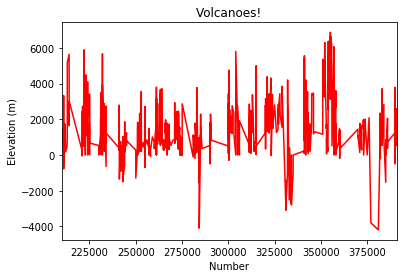

In [60]:
df['Elevation (Meters)'].plot(color='red')    # Create a plot from the DataFrame. Include attributes
plt.title('Volcanoes!')
plt.xlabel('Number')
plt.ylabel('Elevation (m)')
plt.show()

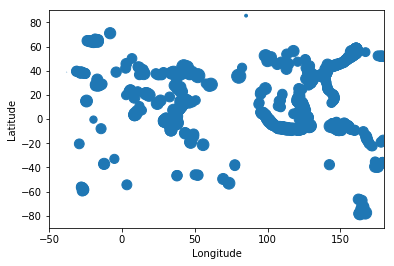

In [139]:
positive_elevations = (df['Elevation (Meters)'] + abs(df['Elevation (Meters)'].min()) + 1).astype(int).values / 50
# Choose a type of plot. Scatterplots allow an additional argument for the size of the dots.
df.plot.scatter(x='Longitude', y='Latitude', s=positive_elevations)  # Specify source for x and y data
# df.plot(x='Longitude', y='Latitude', kind='scatter')    # Alternative syntax
plt.axis((-50, 180, -90, 90))   # Limit the section shown
plt.show()

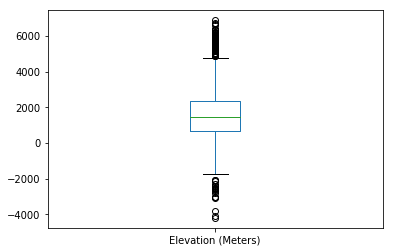

In [101]:
df.plot(kind='box', y='Elevation (Meters)')    # Box plot
plt.show()

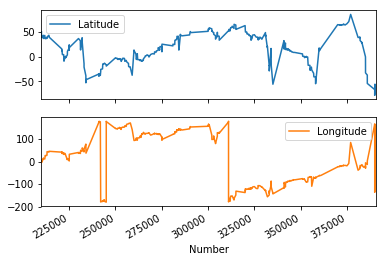

In [71]:
df[['Latitude', 'Longitude']].plot(subplots=True)   # Show different columns on different plots
plt.show()

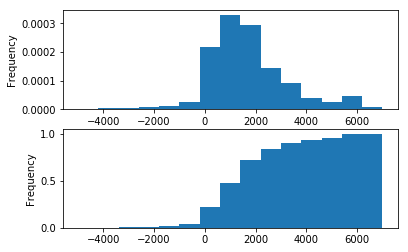

In [147]:
fig, axes = plt.subplots(nrows=2, ncols=1)    # Get subplots beforehand. This allows specifying axis labels
df['Elevation (Meters)'].plot.hist(ax=axes[0], normed=True,       # Set the number of bins and slice of the histogram
                                   bins=15, range=(-5000, 7000))  # This graphs the Probability Density Function
df['Elevation (Meters)'].plot.hist(ax=axes[1], normed=True, cumulative=True,
                                   bins=15, range=(-5000, 7000))  # Make it a Cumulative Density Function
plt.show()

## Cleaning
### Exploratory Data Analysis

In [7]:
# Reload this guy
df = pd.read_csv('./volc_holocene.csv', header=0, index_col='Number')
# Check missing values and surprising data types. Strings appear as 'object'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1508 entries, 210010 to 390847
Data columns (total 11 columns):
Name                   1508 non-null object
Country                1508 non-null object
Region                 1508 non-null object
Type                   1508 non-null object
Activity Evidence      1507 non-null object
Last Known Eruption    1508 non-null object
Latitude               1508 non-null float64
Longitude              1508 non-null float64
Elevation (Meters)     1508 non-null int64
Dominant Rock Type     1455 non-null object
Tectonic Setting       1501 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 141.4+ KB


In [75]:
# Check the frequency of values
df.Region.value_counts(dropna=False)

South America                     197
Indonesia                         142
Japan, Taiwan, Marianas           141
Kamchatka and Mainland Asia       132
Africa and Red Sea                131
México and Central America        120
Alaska                             88
Melanesia and Australia            80
Canada and Western USA             71
Philippines and SE Asia            62
New Zealand to Fiji                60
Middle East and Indian Ocean       46
Kuril Islands                      46
Mediterranean and Western Asia     44
Antarctica                         34
Iceland and Arctic Ocean           34
Hawaii and Pacific Ocean           33
Atlantic Ocean                     30
West Indies                        17
Name: Region, dtype: int64

#### With graphs

[]

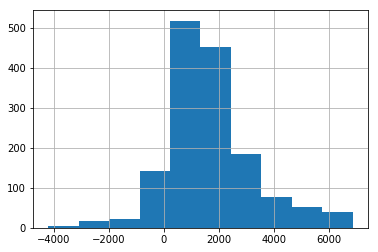

In [74]:
df['Elevation (Meters)'].hist() # Optional parameters include logx, logy (booleans)
                                # rot (degrees to rotate x label)
plt.plot()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


[]

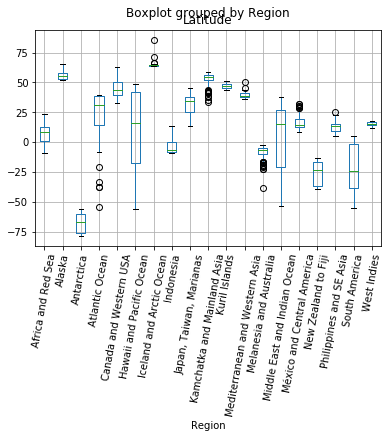

In [77]:
# Another slightly nonsensical plot...
df.boxplot(column='Latitude', by='Region', rot=80)
plt.plot()

### Tidy Data

Named for Hadley Wickham's paper (https://vita.had.co.nz/papers/tidy-data.pdf), the idea that columns represent observed variables, rows represent individual observations, and observational units are grouped in tables. That means separate columns that each represent different cases of a variable can be 'melted' into a single column.

In [31]:
# Me again
df = pd.read_csv('./volc_holocene.csv', header=0, index_col='Number')

The melted version is better for analysis

In [32]:
melted = df.melt(id_vars=['Name', 'Country', 'Region'],    # Identify columns to leave as columns on each row
                                                           # The entries for each of the other columns in each row will be
                                                           #   made rows, with a column for the old column name and a column
                                                           #   for that entry's value
                 var_name='Datum',
                 value_name='Value')
melted.head()

,Name,Country,Region,Datum,Value
0,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Type,Maar(s)
1,Chaine des Puys,France,Mediterranean and Western Asia,Type,Lava dome(s)
2,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Type,Pyroclastic cone(s)
3,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Type,Pyroclastic cone(s)
4,Larderello,Italy,Mediterranean and Western Asia,Type,Explosion crater(s)


The pivoted form is better for reporting

In [10]:
pivoted = melted.pivot_table(index=['Name', 'Country', 'Region'],     # Which columns don't get unstacked
                             columns='Datum',                         # Which column does get unstacked
                             values='Value',                          # Which of the other columns is used to fill in the values
                             aggfunc='first')                         # How to resolve multiple entries for an index entry
                                                                      # This one works with string data.
pivoted

,,Datum,Activity Evidence,Dominant Rock Type,Elevation (Meters),Last Known Eruption,Latitude,Longitude,Tectonic Setting,Type
Name,Country,Region,,,,,,,,
Abu,Japan,"Japan, Taiwan, Marianas",Eruption Dated,Andesite / Basaltic Andesite,641,6850 BCE,34.5,131.6,Subduction Zone / Continental Crust (>25 km),Shield(s)
Acamarachi,Chile,South America,Evidence Credible,Dacite,6046,Unknown,-23.3,-67.62,Subduction Zone / Continental Crust (>25 km),Stratovolcano
Acatenango,Guatemala,México and Central America,Eruption Observed,Andesite / Basaltic Andesite,3976,1972 CE,14.501,-90.876,Subduction Zone / Continental Crust (>25 km),Stratovolcano(es)
Acigol-Nevsehir,Turkey,Mediterranean and Western Asia,Eruption Dated,Rhyolite,1683,2080 BCE,38.537,34.621,Intraplate / Continental Crust (>25 km),Caldera
Adagdak,United States,Alaska,Unrest / Pleistocene,NaN,610,Unknown,51.988,-176.592,Subduction Zone / Intermediate Crust (15-25 km),Stratovolcano
Adams,United States,Canada and Western USA,Eruption Dated,Andesite / Basaltic Andesite,3742,950 CE,46.206,-121.49,Subduction Zone / Continental Crust (>25 km),Stratovolcano
Adams Seamount,Undersea Features,Hawaii and Pacific Ocean,Eruption Dated,Basalt / Picro-Basalt,-39,50 BCE,-25.37,-129.27,Intraplate / Oceanic Crust (< 15 km),Submarine
Adatarayama,Japan,"Japan, Taiwan, Marianas",Eruption Observed,Andesite / Basaltic Andesite,1728,1996 CE,37.647,140.281,Subduction Zone / Continental Crust (>25 km),Stratovolcano(es)
Adwa,Ethiopia,Africa and Red Sea,Evidence Credible,Rhyolite,1733,Unknown,10.07,40.84,Rift Zone / Intermediate Crust (15-25 km),Stratovolcano


Pivoting with multiple indices causes a multi-level index. If you'd rather have a straight numeric index, you can use df.reset_index(), then maybe df.set_index()

In [16]:
print(pivoted.index)
df = pivoted.reset_index().set_index('Name')
print('\nbecomes\n', df.index, sep='\n')

MultiIndex(levels=[['Abu', 'Acamarachi', 'Acatenango', 'Acigol-Nevsehir', 'Adagdak', 'Adams', 'Adams Seamount', 'Adatarayama', 'Adwa', 'Afdera', 'Agrigan', 'Agua', 'Agua de Pau', 'Aguajito, El', 'Aguilera', 'Agung', 'Ahyi', 'Aira', 'Akademia Nauk', 'Akagisan', 'Akan', 'Akandanayama', 'Akhtang', 'Akita-Komagatake', 'Akita-Yakeyama', 'Akuseki-jima', 'Akutan', 'Alaid', 'Alamagan', 'Alayta', 'Alcedo', 'Ale Bagu', 'Alid', 'Aliso', 'Alligator Lake', 'Almolonga', 'Alney-Chashakondzha', 'Alngey', 'Alu-Dalafilla', 'Alutu', 'Amak', 'Amasing', 'Ambalatungan Group', 'Ambang', 'Ambitle', 'Ambre-Bobaomby', 'Ambrym', 'Amiata', 'Amorong', 'Amsterdam Island', 'Amukta', 'Anatahan', 'Anaun', 'Andahua-Orcopampa', 'Andrus', 'Aneityum', 'Aniakchak', 'Ankaizina Field', 'Ankaratra Field', 'Antillanca Group', 'Antisana', 'Antofagasta Volcanic Field', 'Antuco', 'Aoba', 'Aogashima', 'Apagado', 'Apaneca Range', 'Apastepeque Field', 'Apo', 'Apoyeque', 'Aracar', 'Aragats', 'Aramuaca, Laguna', 'Ararat', 'Arayat', 'A

To access strings stored in the data, use the str method on the column. To index lists stored in column values, use .str.get(index). Each returns a series, but you can chain them together.

In [33]:
tectonic_info = df['Tectonic Setting'].str.split('(', 1)
df['Tectonic Zone'] = tectonic_info.str.get(0)
df['Tectonic Range'] = tectonic_info.str.get(1).str.rstrip(')')
df.tail(3)

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting,Tectonic Zone,Tectonic Range
Number,,,,,,,,,,,,,
390812,"Rittmann, Mount",Antarctica,Antarctica,Shield,Unrest / Pleistocene,Unknown,-73.45,165.50,2600,NaN,Intraplate / Continental Crust (>25 km),Intraplate / Continental Crust,>25 km
390829,James Ross Island,Antarctica,Antarctica,Shield,Evidence Credible,Unknown,-64.15,-57.75,1630,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km),Intraplate / Continental Crust,>25 km
390847,Melville,Antarctica,Antarctica,Stratovolcano,Evidence Uncertain,Unknown,-62.02,-57.67,549,NaN,Intraplate / Continental Crust (>25 km),Intraplate / Continental Crust,>25 km


## Concatenating Data

Combining dataframes, maybe a large dataset split into multiple files.

In [58]:
# Let's split our dataframe as an example
df = pd.read_csv('./volc_holocene.csv', header=0, index_col='Number')
half_row = len(df) // 2
set1, set2 = df.iloc[:half_row], df.iloc[half_row:]

# And column-wise
half_col = len(df.columns) // 2
setA, setB = df.iloc[:,:half_col], df.iloc[:,half_col:]

In [48]:
# Combine two sets of rows. This is axis 0
df_concat = pd.concat([set1, set2],
                      ignore_index=False)       # Discard the indices and use a range
                                                # This can avoid duplicate indices
df.equals(df_concat)

True

In [49]:
# Combine two frames of columns
df_concat = pd.concat([setA, setB], axis=1)
df.equals(df_concat)

True

You can merge dataframes like in SQL based on a key column. This will work for 1-1, 1-N, and N-M merges:
* 1-1: Each row will be combined into a single row with the row with the same key from the other dataframe
* 1-N: Each of the N rows with a key will get the columns from the 1 row with that key
* N-M: Every combination of rows with the same key, one from each dataframe, will be included in the result (this is really the same as what happens with the other two)

In [60]:
# Lets take our split dataframes and give them a common key
setC = setB.copy()
setC.insert(0, 'Volcano', setA['Name'])          # Insert the column at the front of the frame!
setC['Volcano'].equals(setA['Name'])

True

In [75]:
merged = pd.merge(left=setA, right=setC,               # Which dataframes to merge
                  # on=None,                           # If the key columns had the same name, we could put it in 'on'
                  left_on='Name', right_on='Volcano')  # Which columns to use as the keys
# Turns out this was a 1-N! Or N-M?
merged.Name.value_counts().head()

Unnamed         529
Santa Isabel      4
Sumbing           4
Santo Tomas       4
Flores            4
Name: Name, dtype: int64

### Data Types

Check the types of the columns with DataFrame.info(). Columns of type 'object' are represented by strings.

In [13]:
df = pd.read_csv('./volc_holocene.csv', header=0, index_col='Number')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1508 entries, 210010 to 390847
Data columns (total 11 columns):
Name                   1508 non-null object
Country                1508 non-null object
Region                 1508 non-null object
Type                   1508 non-null object
Activity Evidence      1507 non-null object
Last Known Eruption    1508 non-null object
Latitude               1508 non-null float64
Longitude              1508 non-null float64
Elevation (Meters)     1508 non-null int64
Dominant Rock Type     1455 non-null object
Tectonic Setting       1501 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 141.4+ KB


For columns with only a small set of values, you can convert the column type to a 'category', reducing memory used.

In [10]:
import sys
df['Evidence Category'] = df['Activity Evidence'].astype('category')
print(sys.getsizeof(df['Activity Evidence']), '>', sys.getsizeof(df['Evidence Category']))

123063 > 14201


Convert columns to numeric types with pd.to_numeric(). Using errors='coerce' substitutes NaN, while 'ignore' halts and returns the original, and the default 'raise' raises an exception.

In [22]:
# These are already numbers, so let's show off a parameter
# This should be equivalent to the original column, but stored in smaller space.
downcast_column = pd.to_numeric(df.Latitude, downcast='float')
print(downcast_column.dtype)
print(sys.getsizeof(df.Latitude), '>', sys.getsizeof(downcast_column))

float32
65112 > 59080
